In [1]:
import pickle
import networkx as nx
import igraph as ig
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import random
import os
os.chdir("D:/uppsala/16. data of social mining/data")

In [2]:
# Load graph data
file_path_pkl = 'part1_retweet_data.pkl'
with open(file_path_pkl, 'rb') as f: # 注意 'rb' (读取二进制)
    G = pickle.load(f)

In [3]:
type(G) # 有向图

igraph.Graph

In [4]:
def igraph_to_networkx(G_ig):
    """把 igraph.Graph 转为 NetworkX Graph/DiGraph（仅保留结构，属性可按需加）。"""
    directed = bool(G_ig.is_directed())
    H = nx.DiGraph() if directed else nx.Graph()
    H.add_nodes_from(range(G_ig.vcount()))
    H.add_edges_from([tuple(e.tuple) for e in G_ig.es])
    return H

# 用法
G = igraph_to_networkx(G)
type(G) # 有向图


networkx.classes.graph.Graph

In [5]:
# gpt 仅仅保留最大网络？但是人家就要计算有多少个component呀，感觉不对
 
n = G.number_of_nodes()
m = G.number_of_edges()

# 计算 ER 模型的参数：p = 2m / (n*(n-1))
p = 2*m / (n*(n-1))
print(f"Order n={n}, Size m={m}, p={p:.6f}")

Order n=378, Size m=596, p=0.008365


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def describe_graph_full(G, name="network", plot=True):
    """
    打印并返回所有要求的网络描述性统计指标
    ✅ 支持 Graph, DiGraph, MultiGraph, MultiDiGraph
    🚫 若为 MultiGraph 类型，不计算不支持的指标，仅输出提示
    """

    # === 1. 基本结构指标 ===
    n = G.number_of_nodes()        # 节点数量
    m = G.number_of_edges()        # 边数量
    density = nx.density(G)        # 网络密度

    # 判断是否有向图
    if nx.is_directed(G):
        components = nx.number_strongly_connected_components(G)
    else:
        components = nx.number_connected_components(G)

    # === 2. 聚类系数与传递性 ===
    clustering = np.nan
    transitivity = np.nan

    if isinstance(G, (nx.MultiGraph, nx.MultiDiGraph)):
        print(f"⚠️ [{name}] MultiGraph type detected — clustering and transitivity not computed.")
    else:
        try:
            clustering = nx.average_clustering(G)
            transitivity = nx.transitivity(G)
        except Exception as e:
            print(f"⚠️ [{name}] Clustering/Transitivity not computed: {e}")
            clustering = np.nan
            transitivity = np.nan

    # === 3. 度分布 ===
    if nx.is_directed(G):
        in_degrees = np.array([d for _, d in G.in_degree()])
        out_degrees = np.array([d for _, d in G.out_degree()])
        avg_in = in_degrees.mean()
        avg_out = out_degrees.mean()
        degrees = in_degrees + out_degrees
        avg_degree = degrees.mean()
    else:
        degrees = np.array([d for _, d in G.degree()])
        avg_degree = degrees.mean()
        avg_in = avg_out = np.nan

    # === 4. 打印结果 ===
    # print(f"\n📊 [{name}]")
    # print(f"Order (nodes): {n}")
    # print(f"Size (edges): {m}")
    # print(f"Number of components: {components}")
    # print(f"Density: {density:.6f}")
    # print(f"Average degree: {avg_degree:.2f}")
    # if nx.is_directed(G):
    #     print(f"  ↳ Average in-degree: {avg_in:.2f}")
    #     print(f"  ↳ Average out-degree: {avg_out:.2f}")
    # print(f"Average clustering coefficient: {clustering}")
    # print(f"Transitivity: {transitivity}")

    # === 5. 可视化度分布 ===
    if plot and len(degrees) > 0:
        plt.figure(figsize=(5,4))
        plt.hist(degrees, bins=50, color='steelblue', edgecolor='black')
        plt.title(f"Degree distribution of {name}")
        plt.xlabel("Degree")
        plt.ylabel("Count")
        plt.show()

    # === 6. 返回结果字典 ===
    return {
        "Network": name,
        "Directed": nx.is_directed(G),
        "Order (n)": n,
        "Size (m)": m,
        "Components": components,
        "Density": density,
        "Avg degree": avg_degree,
        "Avg in-degree": avg_in,
        "Avg out-degree": avg_out,
        "Clustering": clustering,
        "Transitivity": transitivity
    }


In [7]:
#2.1 生成三张 ER 随机图 ------------------------------
er_graphs = []
for seed in [1, 2, 3]:
    H = nx.fast_gnp_random_graph(n, p, seed=seed)
    # 保留最大连通分量
    # H = H.subgraph(max(nx.connected_components(H), key=len)).copy()
    er_graphs.append(H)

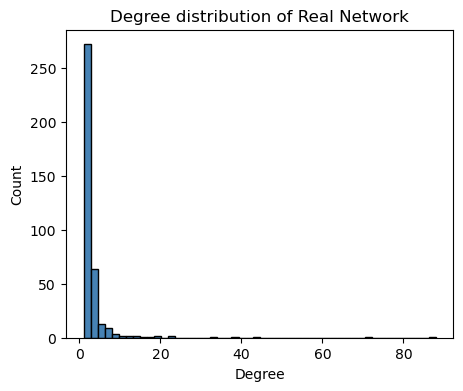

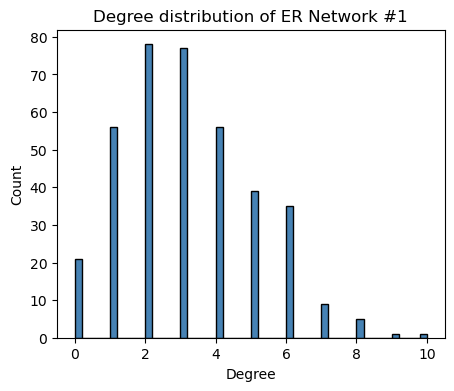

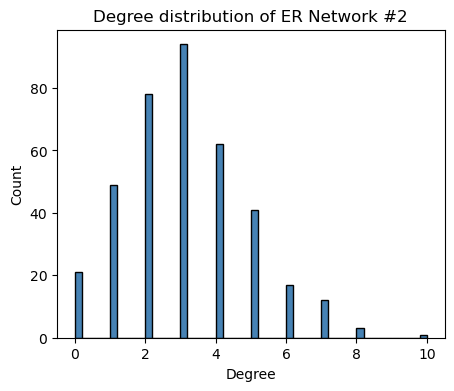

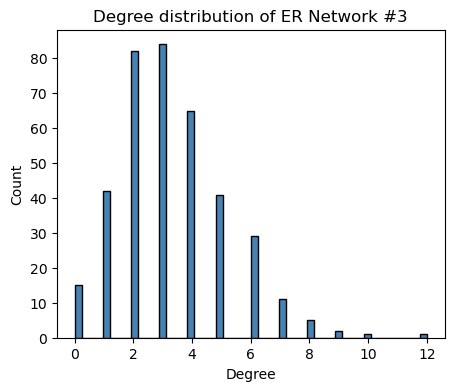

In [8]:
 # 用于存放所有er网络的统计结果
results_er = []

# 1️⃣ 描述真实网络
results_er.append(describe_graph_full(G, name="Real Network"))

# 2️⃣ 描述三张 ER 网络
for i, H in enumerate(er_graphs, start=1):
    results_er.append(describe_graph_full(H, name=f"ER Network #{i}"))

In [9]:
print(pd.DataFrame(results_er) )

         Network  Directed  Order (n)  Size (m)  Components   Density  \
0   Real Network     False        378       596           1  0.008365   
1  ER Network #1     False        378       597          23  0.008379   
2  ER Network #2     False        378       580          23  0.008140   
3  ER Network #3     False        378       627          16  0.008800   

   Avg degree  Avg in-degree  Avg out-degree  Clustering  Transitivity  
0    3.153439            NaN             NaN    0.066033      0.017943  
1    3.158730            NaN             NaN    0.007976      0.012183  
2    3.068783            NaN             NaN    0.012257      0.013498  
3    3.317460            NaN             NaN    0.010907      0.009892  


In [10]:
file_path_pkl = 'network_data.pkl'
with open(file_path_pkl, 'rb') as f: # 注意 'rb' (读取二进制)
    G_loaded_pkl = pickle.load(f)

In [11]:
file_path_pkl = 'er_network_data.pkl'
with open(file_path_pkl, 'wb') as f: # 注意 'wb' (写入二进制)
    pickle.dump(er_graphs[1], f)

In [12]:
#  提取真实网络参数 ===
n = G.number_of_nodes()
m = G.number_of_edges()
p = m / (n * (n - 1))   # ER 模型平均连接概率
avg_degree = 2 * m / n  # 平均度
m_BA = max(1, int(round(avg_degree / 2)))  # BA参数：每个新节点连接的边数

print(f"真实网络: n={n}, m={m}, p≈{p:.6f}, 平均度≈{avg_degree:.2f}, BA参数 m={m_BA}")

#  task 2.2 生成三张 BA 网络 ===
ba_graphs = []
for i in range(3):
    # Step 1: 生成无向 BA 图
    H = nx.barabasi_albert_graph(n=n, m=m_BA, seed=42+i)

    ba_graphs.append( H)

# ===  计算描述性统计指标 ===
results_ba = []

# 真实网络
results_ba.append(describe_graph_full(G, name="Real Retweet Network", plot=False))

# 三张 BA 网络
for i, H in enumerate(ba_graphs, start=1):
    results_ba.append(describe_graph_full(H, name=f"BA Network #{i}", plot=False))

# ===  保存结果到 DataFrame ===
df_ba = pd.DataFrame(results_ba)
# df_ba.to_csv("results_ba_comparison.csv", index=False)
# print("\n✅ Results saved to 'results_ba_comparison.csv'")
print(df_ba)

真实网络: n=378, m=596, p≈0.004182, 平均度≈3.15, BA参数 m=2
                Network  Directed  Order (n)  Size (m)  Components   Density  \
0  Real Retweet Network     False        378       596           1  0.008365   
1         BA Network #1     False        378       752           1  0.010554   
2         BA Network #2     False        378       752           1  0.010554   
3         BA Network #3     False        378       752           1  0.010554   

   Avg degree  Avg in-degree  Avg out-degree  Clustering  Transitivity  
0    3.153439            NaN             NaN    0.066033      0.017943  
1    3.978836            NaN             NaN    0.065499      0.023389  
2    3.978836            NaN             NaN    0.068322      0.020657  
3    3.978836            NaN             NaN    0.066938      0.025600  


In [13]:
file_path_pkl = 'ba_network_data.pkl'
with open(file_path_pkl, 'wb') as f: # 注意 'wb' (写入二进制)
    pickle.dump(ba_graphs[0], f)

In [14]:
type(G) # 无向图

networkx.classes.graph.Graph

In [15]:
# --- Task 2.3: WS networks ---
print("\n--- Task 2.3: WS models ---")

# === 基本参数 ===
n = G.number_of_nodes()
m = G.number_of_edges()
avg_deg = 2 * m / n                      # 无向图平均度
nei = int(round(avg_deg / 2))            # WS参数：每节点连接左右nei个邻居
print(f"Nodes={n}, Edges={m}, Avg degree={avg_deg:.2f}, nei={nei}")

# === 真实网络的参考指标 ===
# 仅在最大连通子图上计算平均路径长度
if nx.is_connected(G):
    L_real = nx.average_shortest_path_length(G)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    L_real = nx.average_shortest_path_length(G.subgraph(largest_cc).copy())

C_real = nx.average_clustering(G)
print(f"Average path length (Real): {L_real:.3f}")
print(f"Clustering coefficient (Real): {C_real:.3f}")

# === 1. 测试不同重连概率 p 的影响 ===
for p in [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]:
    g_tmp = nx.watts_strogatz_graph(n=n, k=nei*2, p=p)
    # 平均路径长度（只算最大连通分量）
    if nx.is_connected(g_tmp):
        L_ws = nx.average_shortest_path_length(g_tmp)
    else:
        cc = max(nx.connected_components(g_tmp), key=len)
        L_ws = nx.average_shortest_path_length(g_tmp.subgraph(cc).copy())
    C_ws = nx.average_clustering(g_tmp)
    print(f"p={p:.2f}, L={L_ws:.3f}, C={C_ws:.3f}")

# === 2. 选择一个与真实网络最接近的 p 值（观察输出后手动设定） ===
p = 0.05     #  high clustering, moderate APL
print(f"\nSelected rewiring probability p={p}")

# === 3. 生成三张 WS 网络，并计算指标 ===
ws_graphs = []
results_ws = []
results_ws.append(describe_graph_full(G, name="Real Retweet Network", plot=False))

for i in range(3):
    g_ws = nx.watts_strogatz_graph(n=n, k=nei*2, p=p, seed=i)
    ws_graphs.append(g_ws)

    # 计算平均路径长度
    if nx.is_connected(g_ws):
        L_ws = nx.average_shortest_path_length(g_ws)
    else:
        cc = max(nx.connected_components(g_ws), key=len)
        L_ws = nx.average_shortest_path_length(g_ws.subgraph(cc).copy())

    C_ws = nx.average_clustering(g_ws)
    print(f"WS #{i+1}: edges={g_ws.number_of_edges()}, "
          f"density={nx.density(g_ws):.6f}, "
          f"clustering={C_ws:.6f}, APL={L_ws:.4f}")

    results_ws.append(describe_graph_full(g_ws, name=f"WS Network {i+1} (N={n}, k={nei}, p={p})", plot=False))





--- Task 2.3: WS models ---
Nodes=378, Edges=596, Avg degree=3.15, nei=2
Average path length (Real): 3.563
Clustering coefficient (Real): 0.066
p=0.01, L=19.200, C=0.488
p=0.05, L=9.834, C=0.425
p=0.10, L=6.913, C=0.356
p=0.30, L=5.311, C=0.201
p=0.50, L=4.711, C=0.056
p=0.70, L=4.583, C=0.021
p=0.90, L=4.529, C=0.010
p=1.00, L=4.548, C=0.007

Selected rewiring probability p=0.05
WS #1: edges=756, density=0.010610, clustering=0.424931, APL=8.8014
WS #2: edges=756, density=0.010610, clustering=0.416830, APL=8.5636
WS #3: edges=756, density=0.010610, clustering=0.421807, APL=9.3573


In [16]:
pd.DataFrame(results_ws)    

,Network,Directed,Order (n),Size (m),Components,Density,Avg degree,Avg in-degree,Avg out-degree,Clustering,Transitivity
0,Real Retweet Network,False,378,596,1,0.008365,3.153439,NaN,NaN,0.066033,0.017943
1,"WS Network 1 (N=378, k=2, p=0.05)",False,378,756,1,0.010610,4.000000,NaN,NaN,0.424931,0.414645
2,"WS Network 2 (N=378, k=2, p=0.05)",False,378,756,1,0.010610,4.000000,NaN,NaN,0.416830,0.402850
3,"WS Network 3 (N=378, k=2, p=0.05)",False,378,756,1,0.010610,4.000000,NaN,NaN,0.421807,0.410390


In [17]:
# ===  保存一个样例 WS 网络，用于 Part 3 ===

file_path_pkl = 'ws_network_data.pkl'
with open(file_path_pkl, 'wb') as f: # 注意 'wb' (写入二进制)
    pickle.dump(ws_graphs[0], f)
print(f"\n✅ Saved WS model network to {file_path_pkl}")


✅ Saved WS model network to ws_network_data.pkl


In [18]:
import copy
# Task 2.4
# ===   1. 获取真实网络的参数 ===
G_base = G.copy() # 使用 LCC 或整个网络，根据你的 Task 1.7 结果决定
n_nodes = G_base.number_of_nodes()
m_edges = G_base.number_of_edges()

# 重排次数 (Swaps): 通常取边数 m 的 10 倍，以保证充分随机化
n_swaps = 10 * m_edges 

print(f"--- Task 2.4: Degree-Preserving Rewiring ---")
print(f"真实网络参数: N={n_nodes}, M={m_edges}")
print(f"计划重排次数 (Swaps): {n_swaps}")

# 用于存放 Task 2.4 结果
rewired_graphs = []
results_rewired = []

# 1️⃣ 描述真实网络
results_rewired.append(describe_graph_full(G_base, name="Real Retweet Network", plot=False))

# 2️⃣ 生成三张度保留随机化网络
for i in range(3):
    # 每次从原始网络 G_base 创建一个新的副本进行重排
    H_rewired = G_base.copy()
    
    # 核心修复: 使用正确的参数名 nswap
    try:
        # 使用双边交换 (double_edge_swap) 进行度保留重排。
        # NetworkX 会修改输入的图对象 H_rewired
        nx.double_edge_swap(
            H_rewired, 
            nswap=n_swaps,                 # 修复后的参数名，对应交换次数
            max_tries=n_swaps * 10, 
            seed=52 + i                    # 使用不同的种子确保三个网络不同
        )
        print(f"✅ Rewired Network #{i+1} Generated.")
    
    except nx.NetworkXError as e:
        # 如果图结构太简单 (如度数太低)，可能无法完成所有交换
        print(f"❌ Rewiring failed for Network #{i+1}: {e}. Keeping the partially randomized graph.")
    
    rewired_graphs.append(H_rewired)
    
    # 3️⃣ 计算描述性统计指标并比较
    results_rewired.append(describe_graph_full(H_rewired, name=f"Rewired Network #{i+1}", plot=False))

# === 结果比较和分析 ===
df_rewired = pd.DataFrame(results_rewired)
print("\n--- Task 2.4 结果比较 (Degree-Preserving Rewiring) ---")
print(df_rewired)

# --- 关键比较点：
# 1. 检查 'Avg degree' 是否与真实网络相似。
# 2. 检查 'Clustering'/'Transitivity' 是否显著低于真实网络。

# 4️⃣ 留存一个用于 PART 3 的网络
file_path_pkl = 'rewired_network_data.pkl'
with open(file_path_pkl, 'wb') as f: 
    pickle.dump(rewired_graphs[0], f)
print(f"\n✅ Saved Rewired model network to '{file_path_pkl}' (for Part 3).")

--- Task 2.4: Degree-Preserving Rewiring ---
真实网络参数: N=378, M=596
计划重排次数 (Swaps): 5960
✅ Rewired Network #1 Generated.
✅ Rewired Network #2 Generated.
✅ Rewired Network #3 Generated.

--- Task 2.4 结果比较 (Degree-Preserving Rewiring) ---
                Network  Directed  Order (n)  Size (m)  Components   Density  \
0  Real Retweet Network     False        378       596           1  0.008365   
1    Rewired Network #1     False        378       596          14  0.008365   
2    Rewired Network #2     False        378       596          14  0.008365   
3    Rewired Network #3     False        378       596          12  0.008365   

   Avg degree  Avg in-degree  Avg out-degree  Clustering  Transitivity  
0    3.153439            NaN             NaN    0.066033      0.017943  
1    3.153439            NaN             NaN    0.094632      0.053552  
2    3.153439            NaN             NaN    0.118310      0.053552  
3    3.153439            NaN             NaN    0.121571      0.048859  